In [1]:
# v7_240109(評価指標追加)

#%%
# 必要に応じてpip
# !pip install --upgrade pip
# !pip install numpy scikit-learn tensorflow matplotlib pillow pandas
# !pip install seaborn

In [2]:
# 機械学習のライブラリ関連をインポート
import pandas as pd
import numpy as np

# ランダムにシャッフルして，学習・テストに分割するモジュール
from sklearn.model_selection import ShuffleSplit

# 評価指標の計算用
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 深層学習のライブラリをインポート
import tensorflow as tf
import tensorflow.keras as keras

#表示系のインポートと設定
import matplotlib.pyplot as plt

# ファイル操作
import os

# 画像操作
from PIL import Image

# 時間取得
import datetime

In [3]:
# DIRS
DATASET_NUM = 10000
DIRS_DATASET = "../Training/Datasets_v0108/Dataset" + str(DATASET_NUM) + "/"

In [4]:
# ファイルを取得, 配列に格納, Pythonリスト型をnumpy.ndarray型に変換
file_names = []
    
# フォルダ内のファイルを取得
files = os.listdir(DIRS_DATASET)

# ファイル名を配列に格納
for file in files:
    file_names.append(file)

# Pythonリスト型をnumpy.ndarray型に変換
file_names = np.array(file_names)

In [5]:
file_names

array(['4510016121775.jpeg', '4510040841489.jpeg', '4510041988985.jpeg',
       ..., '4999915370062.jpeg', '4999978425181.jpeg',
       '4999985455584.jpeg'], dtype='<U18')

In [6]:
def convert_to_grayscale(numpy_array):
    # グレーと言わず2値化
    grayscale_array = np.where(numpy_array <= 128, 0, 255)
    # plt.imshow(grayscale_array) # こいつらのせいで処理が重かった。出力系は要注意
    # print(grayscale_array)
    return grayscale_array

In [7]:
### 画像を配列にしてよしなに
X, y = [], []

In [8]:
for file_name in file_names:
    numpy_array = np.array(Image.open(DIRS_DATASET + file_name)) # 画像をnumpy配列にする
    # print(numpy_array)
    grayscale_array = convert_to_grayscale(numpy_array)
    # print(grayscale_array)
    for i in range(13):
        # grayscale_array1 = np.where(np.all(grayscale_array == 0, axis=-1), 0, 255)
        # print(grayscale_array1)
        grayscale_array2 = np.where(grayscale_array == 255, i+1, 0)
        # print(grayscale_array2)
        X.append(grayscale_array2)
        y.append(file_name[i])

In [9]:
# X, yをPythonリスト型をnumpy.ndarray型に変換
X = np.array(X)
X = X.squeeze()
y = np.array(y, dtype=int)

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
y

array([4, 5, 1, ..., 5, 8, 4])

In [12]:
# ラベルデータをone-hotベクトルに直す
def one_hot_vector(y):
    labels = {
        0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
        2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
        3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
        4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
        5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
        6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
        7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
        8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
        9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
    }

    y = np.array(list(map(lambda v : labels[v] , y)))
    return y

# ラベルデータをone-hotベクトル「から」直す
def one_hot_vector_restore(y):
    labels = {
        (1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 0,
        (0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1,
        (0, 0, 1, 0, 0, 0, 0, 0, 0, 0): 2,
        (0, 0, 0, 1, 0, 0, 0, 0, 0, 0): 3,
        (0, 0, 0, 0, 1, 0, 0, 0, 0, 0): 4,
        (0, 0, 0, 0, 0, 1, 0, 0, 0, 0): 5,
        (0, 0, 0, 0, 0, 0, 1, 0, 0, 0): 6,
        (0, 0, 0, 0, 0, 0, 0, 1, 0, 0): 7,
        (0, 0, 0, 0, 0, 0, 0, 0, 1, 0): 8,
        (0, 0, 0, 0, 0, 0, 0, 0, 0, 1): 9,
    }

    y = np.array([labels[tuple(one_hot)] for one_hot in y])
    return y

In [13]:
y = one_hot_vector(y)

In [14]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
### データの分割
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.8,  # 学習
                  test_size =0.2,  # テスト
                  random_state=0)  # 乱数種（再現用）

# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
X_train.shape[0], X_train.shape[1]

(104000, 337)

In [19]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
### ニューラルネットワークの構築

# 学習し、テストデータで評価し、スコアを表示する
# 引数は、中間層の数、バッチサイズ、epoch数

def fit_epoch(neuron, batch, epochs, ckpt_period, optimizer_name):
    ver_name = "v7_240109"
    
    # チェックポイントの設定
    dt_now = datetime.datetime.now()
    checkpoint_path = "./training_ckpt_" + dt_now.strftime('%Y%m%d%H%M%S') + "_" + ver_name + "_d" + str(DATASET_NUM) + "_n" + str(neuron)  + "_b" + str(batch) + "_e" + str(epochs) + "_"+ optimizer_name + "/cp-{epoch:09d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        verbose=1,
        save_weights_only=True,
        period=ckpt_period  # 重みをckpt_periodエポックごとに保存します
    )


    # レイヤーのオブジェクトを作成
    Dense = keras.layers.Dense

    # モデルの構造を定義
    model = keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(337, )))
    model.add(Dense(neuron, activation='relu'))
    
    # 畳み込み層を追加
    # model.add(tf.keras.layers.Flatten(tf.keras.layers.Conv2D(filters=neuron, kernel_size=(3, 3), activation='relu', input_shape=(1, 337, 3))))

    model.add(Dense(10, activation='softmax')) # 10つのラベルがありsoftmaxで最後の層作る

    # モデルを構築
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer_name,
        metrics=['accuracy']
    )

    # 必要に応じてチェックポイントから再開
    model.load_weights("./training_ckpt_20240110100535_v7_240109_d10000_n512_b32_e80000_Adamax/cp-000007400.ckpt")

    # 学習を実行
    hist = model.fit(X_train, y_train,
        batch_size=batch, # 誤差逆伝播法をするときの1回当たりのデータ数
        epochs=epochs,
        callbacks=[cp_callback],
        verbose=1,
        validation_split=0.1)
    
    # モデルの保存
    model.save("./TrainedModel/" + dt_now.strftime('%Y%m%d%H%M%S') + "_" + ver_name + "_d" + str(DATASET_NUM) + "_n" + str(neuron)  + "_b" + str(batch) + "_e" + str(epochs) + "_"+ optimizer_name)
    
    # モデルを評価
    score = model.evaluate(X_test, y_test, verbose=1)
    print('正解率(Accuracy)=', score[1], 'loss=', score[0])

    # 予測を取得
    predictions = model.predict(X_test)
    predicted_labels = tf.argmax(predictions, axis=1).numpy()
    y_test_restored = one_hot_vector_restore(y_test) # one-hotベクトル「から」直す

    print(predicted_labels)

    # classification_reportを使用して評価指標を表示
    df_report = pd.DataFrame(classification_report(y_test_restored, predicted_labels, output_dict=True)).T
    print(df_report)

    # seabornのヒートマップ
    sns.heatmap(confusion_matrix(y_test_restored, predicted_labels), annot=True)
    plt.xlabel("pred")
    plt.ylabel('true')
    plt.show()
    
    # 学習の様子をグラフへ描画 
    # 正解率の推移をプロット
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ロスの推移をプロット
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [21]:
print(DATASET_NUM)

10000






2925/2925 [==============================] - 17s 5ms/step - loss: 0.0488 - accuracy: 0.9877 - val_loss: 0.1341 - val_accuracy: 0.9790
INFO:tensorflow:Assets written to: ./TrainedModel/20240111091913_v7_240109_d10000_n512_b32_e1_Adamax\assets


INFO:tensorflow:Assets written to: ./TrainedModel/20240111091913_v7_240109_d10000_n512_b32_e1_Adamax\assets


813/813 [==============================] - 3s 3ms/step - loss: 0.1275 - accuracy: 0.9757
正解率(Accuracy)= 0.9756538271903992 loss= 0.12747812271118164
813/813 [==============================] - 2s 3ms/step
[0 1 3 ... 9 5 7]
              precision    recall  f1-score       support
0              0.981689  0.964036  0.972782   2002.000000
1              0.979034  0.979480  0.979257   2193.000000
2              0.987896  0.974736  0.981272   2177.000000
3              0.959507  0.968889  0.964175   2250.000000
4              0.979498  0.978554  0.979026   4150.000000
5              0.982226  0.981920  0.982073   3208.000000
6              0.971480  0.961623  0.966526   2267.000000
7              0.969138  0.986905  0.977941   2291.000000
8              0.988986  0.971158  0.979991   2219.000000
9              0.960435  0.980574  0.970400   3243.000000
accuracy       0.975654  0.975654  0.975654      0.975654
macro avg      0.975989  0.974788  0.975344  26000.000000
weighted avg   0.975757 

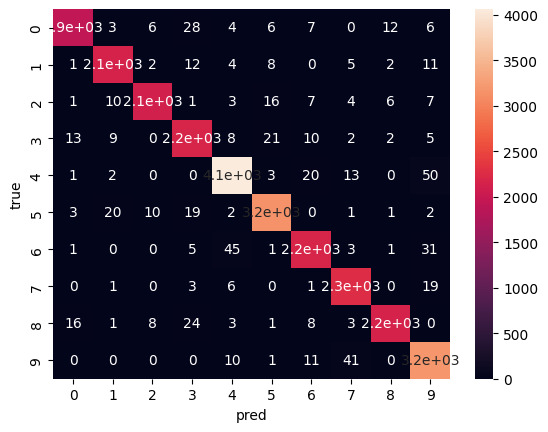

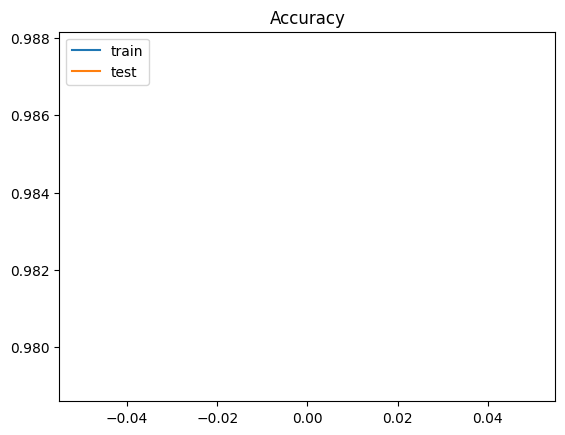

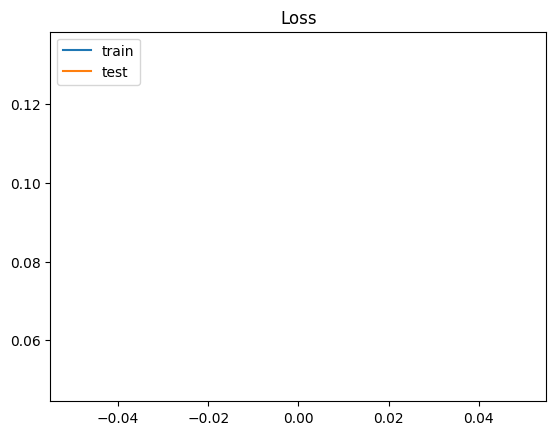

In [22]:
# fit_epoch(中間層の数, バッチサイズ, 学習回数, チェックポイントの作成タイミング, 最適化関数)
fit_epoch(     512,          32,        1,                  2,              "Adamax")